In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


In [5]:
train_df = pd.read_csv('../data/train_data_prepared.csv', index_col=None)

In [7]:
features = list(train_df.columns)
features.remove('isFraud')
print(features)

X = train_df[features].to_numpy()
y = train_df['isFraud'].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.3, random_state=40)

# fit rf on test dataset split
clf = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1, random_state=42)

clf.fit(X_train, y_train)

# calculate score
prediction = clf.predict_proba(X_train)

count = 0
for pred in prediction:
    if pred[1] >= 0.5:
        count += 1
print(count)

print(max(prediction[:, 1]))
score = roc_auc_score(y_train, prediction[:, 1])
print(score)

['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V4

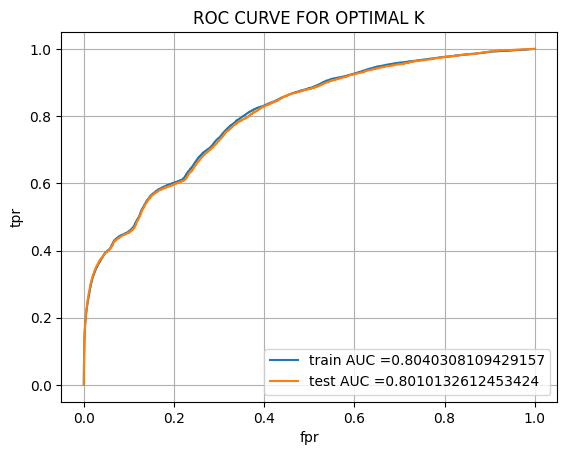

Area under train roc 0.8040308109429157
Area under test roc 0.8010132612453424


In [9]:
best_est = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1, random_state=42, class_weight='balanced')
best_est = best_est.fit(X_train,y_train)

train_fpr, train_tpr, thresholds = roc_curve(y_train, best_est.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, best_est.predict_proba(X_test)[:,1])
plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))